In [1]:
%matplotlib inline

import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')


In [2]:
# index_col=False is used to fix the column headings not lining up with the values. 
# Without it, they come in off-by-one

# Data retrieved from http://www.fec.gov/disclosurep/PDownload.do
# Not included in repo because of file size
contribs = pd.read_csv("data/P00000001-CT.csv",index_col=False)
contribs.head(1)

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,tran_id,election_tp
0,C00575795,P00003392,"Clinton, Hillary Rodham","DEWAN, MAUREEN",FAIRFIELD,CT,68253227.0,RETIRED,ATTORNEY,500.0,12-MAY-16,NaN,NaN,NaN,SA17A,1079219,C4962199,P2016


In [3]:
contribs[contribs["contbr_nm"].str.upper() == "ABBRUZZESE-ROSA, PAMELA"].count()

cmte_id              85
cand_id              85
cand_nm              85
contbr_nm            85
contbr_city          85
contbr_st            85
contbr_zip           85
contbr_employer      85
contbr_occupation    85
contb_receipt_amt    85
contb_receipt_dt     85
receipt_desc          0
memo_cd               1
memo_text             1
form_tp              85
file_num             85
tran_id              85
election_tp          85
dtype: int64

In [4]:
contribs[contribs["cand_nm"].isnull()]

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,tran_id,election_tp


In [5]:
contribs.columns[1:]

Index([u'cand_id', u'cand_nm', u'contbr_nm', u'contbr_city', u'contbr_st',
       u'contbr_zip', u'contbr_employer', u'contbr_occupation',
       u'contb_receipt_amt', u'contb_receipt_dt', u'receipt_desc', u'memo_cd',
       u'memo_text', u'form_tp', u'file_num', u'tran_id', u'election_tp'],
      dtype='object')

In [6]:
contribs.dtypes

cmte_id               object
cand_id               object
cand_nm               object
contbr_nm             object
contbr_city           object
contbr_st             object
contbr_zip           float64
contbr_employer       object
contbr_occupation     object
contb_receipt_amt    float64
contb_receipt_dt      object
receipt_desc          object
memo_cd               object
memo_text             object
form_tp               object
file_num               int64
tran_id               object
election_tp           object
dtype: object

In [7]:
# Convert contb_receipt_dt to datetime

contribs["clean_date"] = contribs.apply(lambda x: pd.to_datetime(x["contb_receipt_dt"]), axis=1)
contribs.dtypes

cmte_id                      object
cand_id                      object
cand_nm                      object
contbr_nm                    object
contbr_city                  object
contbr_st                    object
contbr_zip                  float64
contbr_employer              object
contbr_occupation            object
contb_receipt_amt           float64
contb_receipt_dt             object
receipt_desc                 object
memo_cd                      object
memo_text                    object
form_tp                      object
file_num                      int64
tran_id                      object
election_tp                  object
clean_date           datetime64[ns]
dtype: object

In [8]:
# How many contributions were recorded?

contribs["tran_id"].size

53046

In [9]:

summary = contribs["cand_nm"].value_counts().to_frame().reset_index()
summary.columns = ["candidate","count"]

# Sum a given column, grouped by candidate
def col_sum(col_nm):
    return contribs.groupby("cand_nm").agg({col_nm:np.sum}).reset_index()

summary = summary.merge(col_sum("contb_receipt_amt"),
              left_on="candidate",
              right_on="cand_nm",
              how="inner")

summary = summary.drop("cand_nm",1)
summary

,candidate,count,contb_receipt_amt
0,"Sanders, Bernard",29906,1284785.94
1,"Clinton, Hillary Rodham",13981,3610266.23
2,"Cruz, Rafael Edward 'Ted'",3411,355633.49
3,"Carson, Benjamin S.",1786,166461.95
4,"Rubio, Marco",1252,524587.81
5,"Bush, Jeb",700,1090774.00
6,"Kasich, John R.",613,374578.00
7,"Paul, Rand",388,63231.16
8,"Fiorina, Carly",294,84638.95
9,"Trump, Donald J.",180,45292.70


In [10]:
summary.to_csv("output/candidate_totals.csv")

In [11]:
# What is the latest date in this data set?

contribs["clean_date"].sort_values(ascending=False).head(1)

6814   2016-05-31
Name: clean_date, dtype: datetime64[ns]

In [12]:
# What is the earliest date in this data set?
contribs["clean_date"].sort_values(ascending=True).head(1)

52511   2014-09-22
Name: clean_date, dtype: datetime64[ns]

In [13]:
month_dict = ["ERROR","Jan","Feb","March","April","May","June",
             "July","Aug","Sept","Oct","Nov","Dec"]

by_month = contribs.groupby(["cand_nm",contribs["clean_date"]\
                            .map(lambda x: str(x.year) + "-" + str(x.month).zfill(2))])

In [14]:
by_month.sum().reset_index().head()

,cand_nm,clean_date,contbr_zip,contb_receipt_amt,file_num
0,"Bush, Jeb",2015-06,1.627428e+10,534150.0,260760051
1,"Bush, Jeb",2015-07,4.422478e+09,130650.0,69117774
2,"Bush, Jeb",2015-08,3.715246e+09,81350.0,58670380
3,"Bush, Jeb",2015-09,3.429876e+09,94300.0,56550906
4,"Bush, Jeb",2015-10,6.311540e+09,132547.0,99717855


In [15]:
# http://pandas.pydata.org/pandas-docs/stable/reshaping.html

sums_by_candidate_by_month = by_month.sum().reset_index()\
.pivot(index='cand_nm', 
       columns='clean_date', 
       values='contb_receipt_amt').reset_index()

sums_by_candidate_by_month

clean_date,cand_nm,2014-09,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,...,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05
0,"Bush, Jeb",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,534150.00,...,81350.00,94300.00,132547.00,53378.00,43511.00,20886.00,2.00,NaN,NaN,NaN
1,"Carson, Benjamin S.",NaN,NaN,NaN,NaN,NaN,4250.0,5325.00,9190.00,8475.00,...,20063.00,26109.28,19144.60,17696.00,14269.32,12012.16,20571.11,3409.00,-1800.00,NaN
2,"Christie, Christopher J.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10940.38,70929.62,28300.00,68900.00,20425.00,11425.00,13275.00,NaN,NaN,NaN
3,"Clinton, Hillary Rodham",NaN,NaN,NaN,NaN,NaN,NaN,209840.48,285045.36,327722.54,...,77229.11,154894.02,252260.36,74564.32,136114.82,227752.98,392386.37,575036.77,598449.13,239115.75
4,"Cruz, Rafael Edward 'Ted'",NaN,NaN,NaN,NaN,NaN,1300.0,10858.00,3815.00,6974.00,...,22317.00,32630.00,7405.00,19243.00,38229.50,21113.00,46596.50,62297.00,57659.54,16427.95
5,"Fiorina, Carly",NaN,NaN,NaN,NaN,NaN,NaN,NaN,3450.00,11350.00,...,18200.00,23663.00,11411.00,2000.95,4145.00,4585.00,1309.00,NaN,NaN,NaN
6,"Graham, Lindsey O.",NaN,NaN,NaN,NaN,9250.0,23000.0,1500.00,NaN,24100.00,...,325.00,17475.00,4710.00,1525.00,1250.00,-5100.00,0.00,2700.00,NaN,NaN
7,"Huckabee, Mike",NaN,NaN,NaN,NaN,NaN,NaN,NaN,250.00,2850.00,...,872.50,1000.00,250.00,530.00,500.00,25.00,116.00,NaN,NaN,NaN
8,"Jindal, Bobby",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2700.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,"Johnson, Gary",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1000.00,700.00,1575.00,593.70,3350.00


In [16]:
sums_by_candidate_by_month.set_index("cand_nm").transpose().to_csv("output/candidate_monthly.tsv",sep="\t")

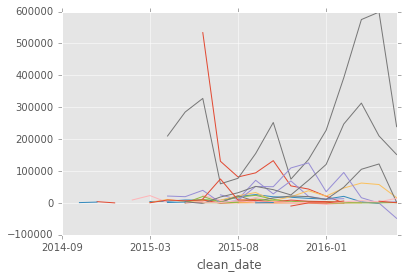

In [17]:
sums_by_candidate_by_month.set_index("cand_nm").transpose().plot(legend=False)
plt.show()

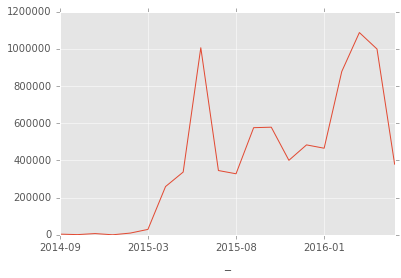

In [18]:
all_candidates_monthly = sums_by_candidate_by_month.set_index("cand_nm").sum()
all_candidates_monthly.plot()
plt.xlabel("_")
plt.show()